<a href="https://colab.research.google.com/github/Erfandarzi/keshtkar/blob/master/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [22]:

from google.colab import files

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
print('hello')
batch_size = 32
nb_classes = 10
nb_epoch = 30
lr=0.001
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_val = X_train[40000:].reshape(20000, 784)
X_train = X_train[:40000].reshape(40000, 784)
# X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)


X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

Y_val = np_utils.to_categorical(y_train, nb_classes)[40000:]
Y_train = np_utils.to_categorical(y_train, nb_classes)[:40000]
# Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Deep Multilayer Perceptron model
model = Sequential()
model.add(Dense(output_dim=512, input_dim=784, init='normal'))
model.add(Activation('relu'))
model.add(Dense(output_dim=512, input_dim=512, init='normal'))
model.add(Activation('relu'))
model.add(Dense(output_dim=512, input_dim=512, init='normal'))
model.add(Activation('relu'))
model.add(Dense(output_dim=10, input_dim=512, init='normal'))
model.add(Activation('softmax'))

model.compile(optimizer=RMSprop(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(X_train, Y_train,nb_epoch=nb_epoch, batch_size=batch_size, verbose=1)

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
files.download(' lr='+str(lr)+'batch='+str(batch_size)+'.csv') 
  
# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

hello


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, units=512, kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=512, units=512, kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=512, units=512, kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=512, units=10, kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_76 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_77 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_78 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 10)              

KeyboardInterrupt: ignored

In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np

# Hyper parameters
batch_size = 128
nb_epoch = 30

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28




Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)  # Multiple encoding
decoded = Dense(64, activation='relu')(encoded)  # and decoding layers.
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()


encoder = Model(autoencoder.input, autoencoder.layers[-4].output)
encoder.summary()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
__________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [4]:
autoencoder.fit(x_train, x_train,
                nb_epoch=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until





Train on 60000 samples, validate on 10000 samples
Epoch 1/30





60000/60000 [==============================] - 5s 76us/step - loss: 0.2978 - val_loss: 0.2525
Epoch 2/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.2388 - val_loss: 0.2186
Epoch 3/30
60000/60000 [==============================] - 4s 58us/step - loss: 0.2065 - val_loss: 0.1917
Epoch 4/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.1871 - val_loss: 0.1777
Epoch 5/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.1742 - val_loss: 0.1671
Epoch 6/30
60000/60000 [==============================] - 4s 59us/step - loss: 0.1648 - val_loss: 0.1593
Epoch 7/30
60000/60000 [==============================] - 4s 58us/step - loss: 0.1581 - val_loss: 0.1543
Epoch 8/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.1524 - val_loss: 0.1480
Epoch 9/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.1482 - val_loss: 0.14

KeyboardInterrupt: ignored

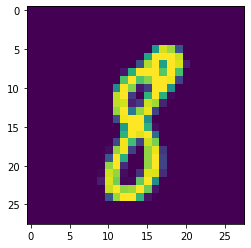

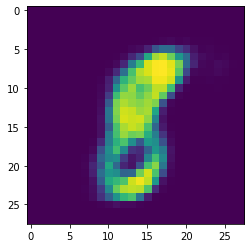

[[11.053128   6.6165695  6.8909736 ...  0.         5.515209   0.       ]
 [ 6.7437205 11.352778  10.010343  ...  0.         3.9720864  0.       ]
 [ 5.2276654  0.         2.5341744 ...  0.         6.1068907  0.       ]
 ...
 [ 7.855392   8.876904   1.6544573 ...  0.         6.7352166  0.       ]
 [ 5.1950393  7.796343   4.348105  ...  0.         5.024893   0.       ]
 [ 9.784242  10.705008   4.589142  ...  0.         7.740166   0.       ]]


In [5]:
encoderdecoder=autoencoder.predict(x_train)
encoded=encoder.predict(x_train)

import cv2
import matplotlib.pyplot as plt
plt.imshow(np.reshape(x_train[300],(28,28)))
plt.show()

plt.imshow(np.reshape(encoderdecoder[300],(28,28)))
plt.show()
print((encoded))

In [0]:

from google.colab import files

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
batch_size = 4
nb_classes = 10
nb_epoch = 30

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Deep Multilayer Perceptron model
model = Sequential()
model.add(Dense(output_dim=625, input_dim=32, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim=625, input_dim=625, init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=10, input_dim=625, init='normal'))
model.add(Activation('softmax'))

model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(encoded, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=32, units=625, kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=625, units=625, kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=625, units=10, kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 625)               20625     
_________________________________________________________________
activation_4 (Activation)    (None, 625)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 625)               391250    
_________________________________________________________________
activation_5 (Activation)    (None, 625)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 625)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               